##### <div style="text-align: center"> DA5401 Data Analytics Labarotary  </div>

##### <div style="text-align: center">Assignment 4 - Submitted by: DA24M011 - Nandhakishore C S</div>

<p style='text-align: justify;'> (From Question) <p>
<p style='text-align: justify;'> 
    Consider a <i>DummyBinaryClassifier</i> that returns a random label in {True, False} for any test input that’s fed to it. This classifier does not require any training! Hope, that was already obvious to you. Implement this <i>DummyBinaryClassifier</i> as a Python class by extending the BaseEstimator class of sklearn, so that you have mandatory methods such as <i>fit(X, y)</i>  and <i>predict(X)</i> are implemented. As your guess, the <i>fit()</i> method would be a dummy 'pass', but the <i>predict()</i> method would return True or False randomly.
</p>

##### <div style="text-align: left"> Task 1  [10 points]</div>
<p style='text-align: justify;'> (From Question) <p>
<p style='text-align: justify;'> 
    Let’s measure the label distribution (prior probability) of the predictions made by <i>DummyBinaryClassifier</i>. As you guessed, the label distribution is dependent on the random generator, which typically could be one of {Normal, Bernoulli or Uniform} distributions. As a part of Task 1, you are to implement all the above three generators (using libraries). You may choose the generator type while instantiating the classifier object. Moreover, Bernoulli requires ‘p’ as a parameter representing the probability of “True”. Likewise, the normal and uniform distributions require a threshold to convert the discrete samples into Booleans. You may assume that the threshold is in [0,1] range. Typically, you will instantiate as <i>DummyBinaryClassifier(method = ’bernoulli’, p = 0.5)</i>. The expectation is a line-plot with the x-axis represent the p in [0,1] in steps of 0.1 and the y-axis representing the Pr(True).Your plot will have 3 such lines representing 3 different random generators
</p>

In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
from sklearn.base import BaseEstimator # type: ignore
from scipy.stats import bernoulli # type: ignore
from collections import * 

class DummyBinaryClassifier(BaseEstimator): 
    
    # using __slots__ to allocate memory efficiently 
    __slots__  = '_method', '_parameter'
    
    # Class intialisation function 
    def __init__(self, method:str = 'uniform_random', parameter:float = 0.5):
        self._method = method if method in ['bernoulli', 'gaussian', 'uniform_random'] else 'uniform_random'
        self._parameter = 0.5 if parameter < 0 or parameter > 1 else parameter

    # Dummy fit function, doesn't return anything, pass 
    def fit(self, X = None, Y = None) -> None: 
        pass
        
    # Predict function for each prior generator with parameter p 
    def predict(self, X) -> np.array: 
        if(self._method == 'bernoulli'):
            return np.bool_(bernoulli.rvs(p = self._parameter, size = len(X)))
        elif(self._method == 'gaussian'): 
            return (0.5 + np.random.randn(len(X))) < self._parameter
        elif(self._method == 'uniform_random'): 
            return np.random.rand(len(X)) < self._parameter

    # Computing class  proportions for the given label of a datapoint using the Counter function
    def compute_prior(y) -> dict: 
        c = Counter(y)
        class_proportions = {i[0]:i[1]/len(y) for i in c.items()}
        if True not in class_proportions: 
            class_proportions[True] = 0.0 
        if False not in class_proportions: 
            class_proportions[False] = 0.0 
        return class_proportions

<p style='text-align: left;'> Using numpy.random to get random test data with 1000 data points <p>

In [2]:
# getting random test data using numpy
x = np.random.rand(1000)

In [3]:
from collections import *

# initialisation of classifier using uniform generator 
clf = DummyBinaryClassifier(method = 'uniform_random', parameter = 0.3) 
y_uniform = clf.predict(x)
c = Counter(y_uniform)
{i[0]: i[1] / len(y_uniform) for i in c.items()}

{False: 0.709, True: 0.291}

In [4]:
# initialisation of classifier using gaussian generator 
clf = DummyBinaryClassifier(method = 'gaussian', parameter = 0.3) 
y_gaussian = clf.predict(x)
c = Counter(y_gaussian)
{i[0]: i[1] / len(y_gaussian) for i in c.items()}

{False: 0.588, True: 0.412}

In [5]:
# initialisation of classifier using bernoulli generator 
clf = DummyBinaryClassifier(method = 'bernoulli', parameter = 0.5) 
y_bernoulli = clf.predict(x)
c = Counter(y_bernoulli)
{i[0]: i[1] / len(y_bernoulli) for i in c.items()}

{False: 0.492, True: 0.508}

<p style='text-align: justify;'> 
    Generating Prior probabilities for the label using Uniform, Gaussian, Benoulli generators and plotting the curve: <i>Parameter(p) vs Predict(p)</i>
</p> 

In [6]:
parameter_values = np.arange(0., 1.1, 0.1)
bernoulli_values = [] 
gaussian_values = []
uniform_values = [] 

for i in parameter_values: 
    # classifier with bernoulli generator 
    y = DummyBinaryClassifier(method = 'uniform_random', parameter = i).predict(x)
    uniform_values.append(DummyBinaryClassifier.compute_prior(y)[True])

    # classifier with gaussian generator 
    y = DummyBinaryClassifier(method = 'gaussian', parameter = i).predict(x) 
    gaussian_values.append(DummyBinaryClassifier.compute_prior(y)[True])
    
    # classifier with bernoulli generator 
    y = DummyBinaryClassifier(method = 'bernoulli', parameter = i).predict(x) 
    bernoulli_values.append(DummyBinaryClassifier.compute_prior(y)[True])

<p style='text-align: justify;'> 
    plotting the parameter vs prediction(parameter) graph 
</p> 

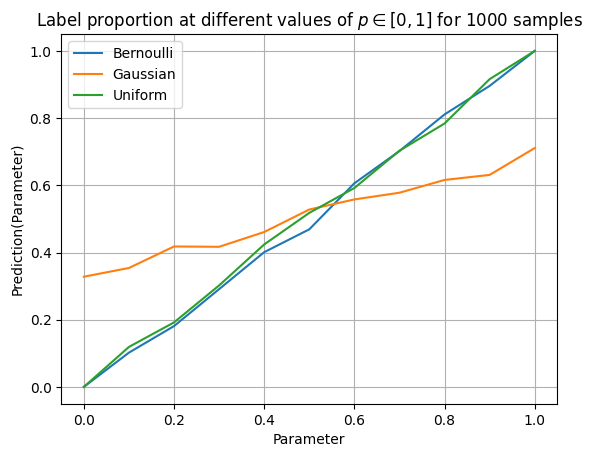

In [7]:
import matplotlib.pyplot as plt # type: ignore 
plt.plot(parameter_values, bernoulli_values)
plt.plot(parameter_values, gaussian_values)
plt.plot(parameter_values, uniform_values)
plt.xlabel('Parameter')
plt.ylabel('Prediction(Parameter)')
plt.title('Label proportion at different values of $p\in[0,1]$ for 1000 samples')
plt.legend(['Bernoulli','Gaussian', 'Uniform'], loc = 'best')
plt.grid()
plt.show()

##### <div style="text-align: left"> Task 2  [20 points]</div>
<p style='text-align: justify;'> (From Question) <p>
<p style='text-align: justify;'> 
    Consider the IRIS dataset, but convert the 3-class dataset into a binary class dataset by choosing the majority class as say class True and the remaining two classes as class False.    Now, using the bernoulli version of the DummyBinaryClassifier, make the prediction of binary IRIS dataset. 
</p>

1. Report the label prior of the binary IRIS dataset.
2. Compute the Precision, Recall, F1 of the prediction at different choice of p-values in [0,1] in steps of 0.1 and plot the P, R, C as line plots.
3. Using the P & R values, plot PRC.
4. Using TPR and FPR, plot RoC.
5. Report the AUPRC and AURoC

In [8]:
# Loading IRIS Dataset 
from sklearn import datasets # type: ignore
iris = datasets.load_iris()

In [9]:
# Converting 3 class dataset into a 2 class dataset 

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns = feature_names)
df['target'] = y 

class_count = df['target'].value_counts()
majority_class = class_count.idxmax()

# Appeding the minor classes together with 1-0 encoding 
# 1 as major class and 0 as minor class
df['binary_target'] = df['target'] == majority_class

X_binary = df[feature_names].values
y_binary = df['binary_target'].values

<p style='text-align: Left;'> 1. Report the label prior of the binary IRIS dataset. </p>


In [10]:
# Final class proportions - setosa as majority class and other two classes as minority class 
print("Class mapping:")
print(f"Majority class (True): {target_names[majority_class]}")
print(f"Other classes (False): {[target_names[i] for i in range(3) if i != majority_class]}")

# Optional: Check the class distribution in the binary target
binary_class_counts = pd.Series(y_binary).value_counts()
print("\nBinary class distribution:")
print(binary_class_counts)

Class mapping:
Majority class (True): setosa
Other classes (False): ['versicolor', 'virginica']

Binary class distribution:
False    100
True      50
dtype: int64


In [11]:
clf = DummyBinaryClassifier(method = 'bernoulli', parameter = 0.5) 

y_bernoulli = clf.predict(df['binary_target'])
c = Counter(y_bernoulli)
{i[0]: i[1] / len(y_bernoulli) for i in c.items()}

{True: 0.48, False: 0.52}

<p style='text-align: Left;'> 2. Computing the Precision, Recall, F1 of the prediction at different choice of p-values in [0,1] in steps of 0.1 and plot the P, R, C as line plots. </p>

In [12]:
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import precision_recall_curve, roc_curve, auc # type: ignore

train_x, test_x, train_y, test_y = train_test_split(X_binary, y_binary, test_size = 0.25, random_state = 42)

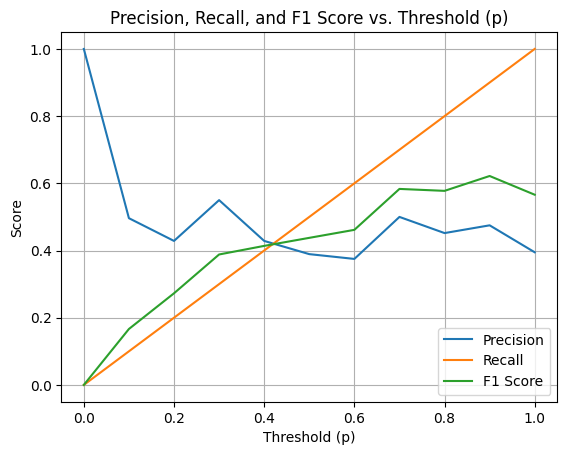

In [13]:
parameter_values = np.arange(0., 1.1, 0.1)
precision_values = [] 
recal_values = []
f1_values = [] 

for p in parameter_values: 
    clf = DummyBinaryClassifier(method='bernoulli', parameter = p)
    y_pred = clf.predict(test_x)

    precision, recal, _  = precision_recall_curve(test_y, y_pred)
    precision_at_p = np.interp(p, recal[::-1], precision[::-1])
    recal_at_p = p
    f1_at_p = 2 * (precision_at_p * recal_at_p) / (precision_at_p + recal_at_p + 1e-10)
    
    # precision_at_p = precision[np.searchsorted(precision, p, side='right') - 1]
    # recal_at_p = recal[np.searchsorted(recal, p, side = 'right') - 1]
    # f1_at_p = 2 * (precision_at_p * recal_at_p) / (precision_at_p + recal_at_p + 1e-10)

    precision_values.append(precision_at_p)
    recal_values.append(recal_at_p)
    f1_values.append(f1_at_p)

plt.plot(parameter_values, precision_values, label='Precision')
plt.plot(parameter_values, recal_values, label='Recall')
plt.plot(parameter_values, f1_values, label='F1 Score')
plt.xlabel('Threshold (p)')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold (p)')
plt.legend()
plt.grid()
plt.show()

<p style='text-align: justify;'> 3. Using P & R Values, Ploting PRC curve </p>


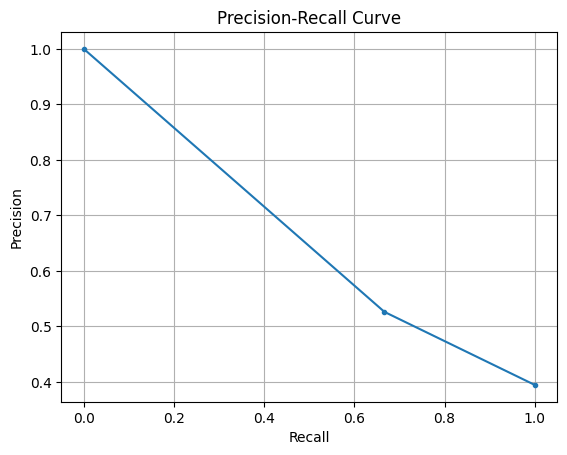

In [14]:
dummy_clf = DummyBinaryClassifier(method = 'bernoulli', parameter = 0.5)
dummy_clf.fit(train_x, train_y)
y_pred = dummy_clf.predict(test_x)
precision, recall, _ = precision_recall_curve(test_y, y_pred)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

<p style='text-align: justify;'> 4. Using TPR and FPR, ploting RoC. <p>

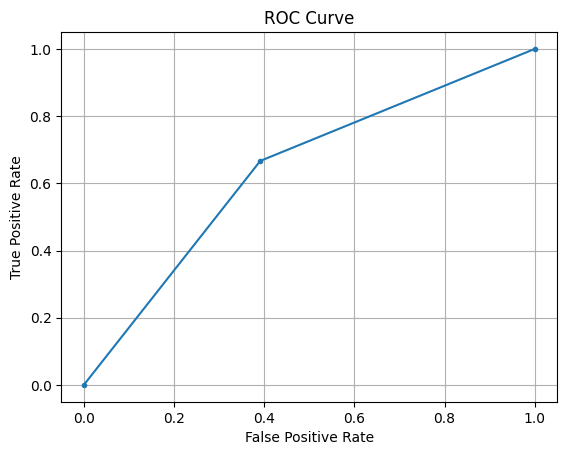

In [15]:
fpr, tpr, _ = roc_curve(test_y, y_pred)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

<p style='text-align: justify;'> 5. Reporting the AUPRC and AURoC <p>

In [16]:
auprc = auc(recall, precision)
auroc = auc(fpr, tpr)

# print(f"AUPRC: {auprc:.4f}")
# print(f"AURoC: {auroc:.4f}")
print(f"AUPRC: {auprc}")
print(f"AURoC: {auroc}")

AUPRC: 0.6622807017543859
AURoC: 0.6376811594202899


##### <div style="text-align: left"> Task 3 [20 points]</div>
<p style='text-align: justify;'> (From Question) <p>
<p style='text-align: justify;'> 
    Generate the visualization of the decision boundaries induced by <i>DummyBinaryClassifier</i> at different values of p in [0, 1] in steps of 0.25 for all the three random generators
</p>

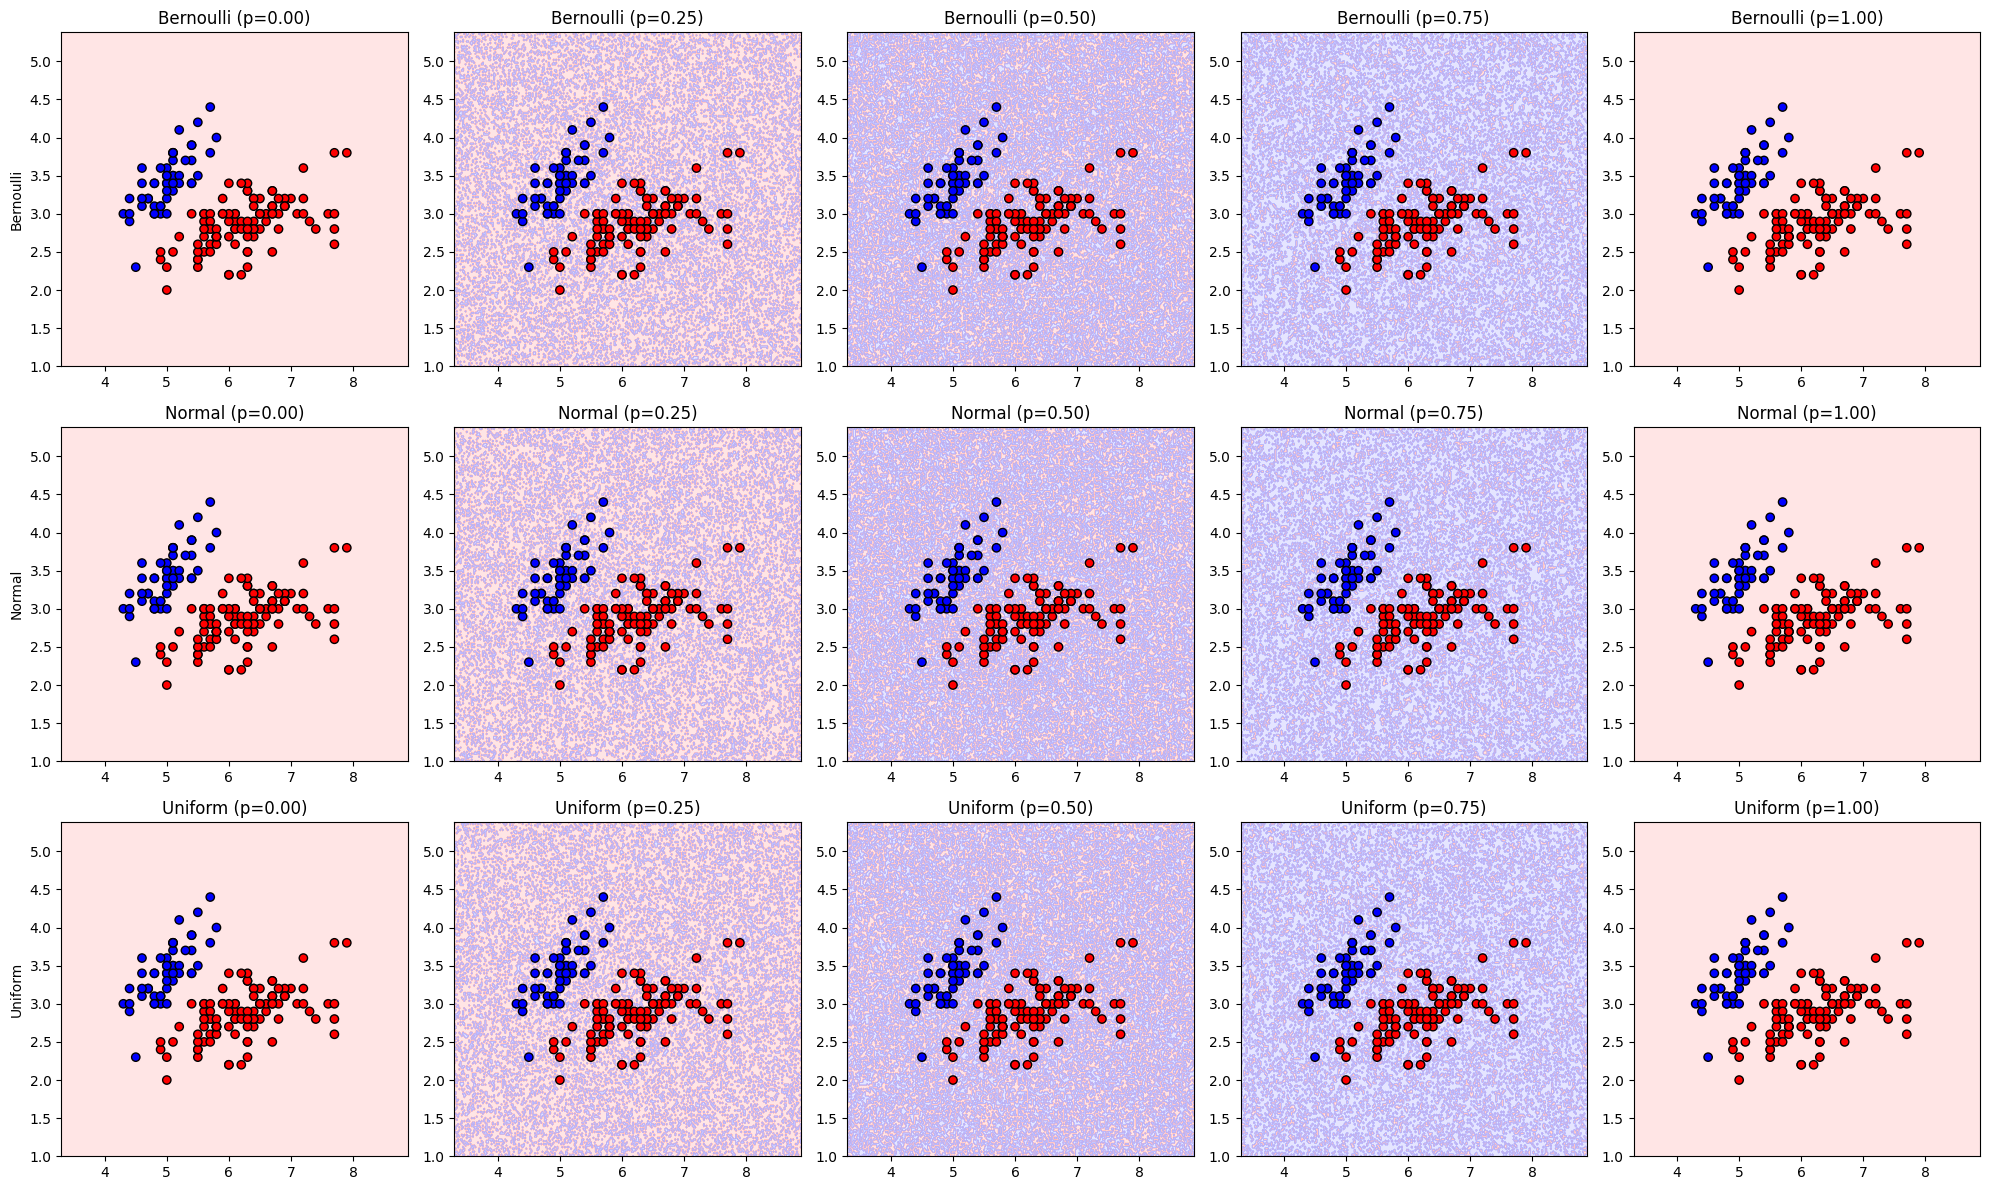

In [17]:
from matplotlib.colors import ListedColormap # type: ignore
from sklearn.datasets import load_iris # type: ignore

# Define the plot boundaries
def plot_decision_boundary(X, y, classifier, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k')
    ax.set_title(title)
    return scatter

X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns = feature_names)
df['target'] = y 

class_count = df['target'].value_counts()
majority_class = class_count.idxmax()

# Appeding the minor classes together with 1-0 encoding 
# 1 as major class and 0 as minor class
df['binary_target'] = df['target'] == majority_class

X_binary = df[feature_names].values
y_binary = df['binary_target'].values


# Plot decision boundaries for different values of p and methods
fig, axs = plt.subplots(3, 5, figsize=(20, 12))
for i, method in enumerate(['bernoulli', 'normal', 'uniform']):
    for j, p in enumerate(np.arange(0, 1.1, 0.25)):
        clf = DummyBinaryClassifier(method=method, parameter=p)
        clf.fit(X_binary, y_binary)
        scatter = plot_decision_boundary(X_binary, y_binary, clf, axs[i, j], f'{method.capitalize()} (p={p:.2f})')
        if j == 0:
            axs[i, j].set_ylabel(method.capitalize())
plt.tight_layout()
plt.show()
